# CNN

---
CNN은 이미지의 특징을 필터를 통해 두드러지게 하여, 이미지 인식에 좋은 성능을 보인다.

그럼 앞서 훈련한 모델을 가져와, **가중치**는 무엇을 의미하고, **특징맵**을 시각화하여 무엇을 학습했는지 확인해 보도록 하자.

- 1️⃣ 가중치
- 2️⃣ 특성 맵

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load model

In [12]:
from tensorflow import keras

model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/ai-study/hongong/DL/best-cnn-model.keras')

In [13]:
model.layers

## 1️⃣ 가중치

### 가중치 확인

In [14]:
# 첫 번째 층에서 학습한 커널
conv = model.layers[0]

# 가중치, 절편
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


(3, 3, 1) 커널 32개

In [15]:
# 가중치 평균과 표준편차
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.014563794 0.22314845


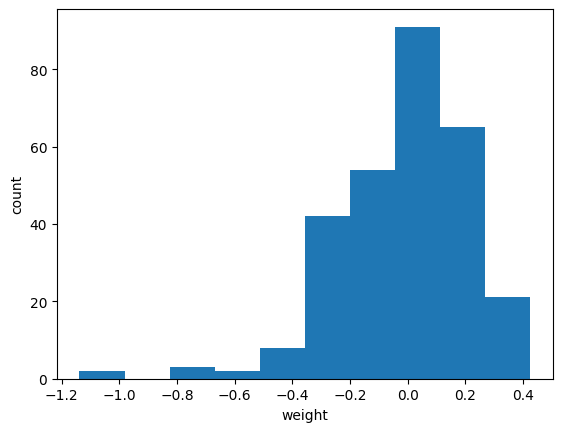

In [16]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

(3,3)의 32개 커널 plot

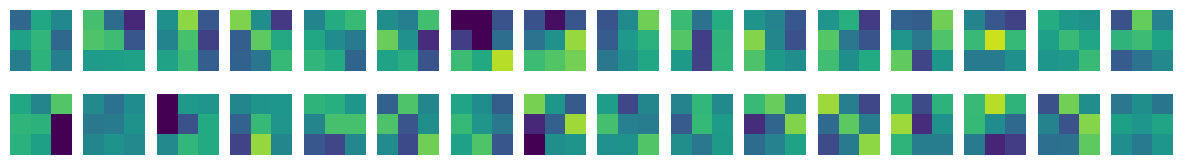

In [19]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

밝은 부분이 가중치가 높다.
imshow는 커널의 최댓값 최소값을 기준으로 출력하므로 절댓값을 기준으로 출력하도록 vmin, vmas값을 설정해 범위를 지정했다.

## 훈련하지 않은 모델

In [20]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same',
                                          activation='relu', input_shape=(28, 28, 1)))

In [22]:
no_training_conv = no_training_model.layers[0]

# 가중치 shape
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [23]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.0013807517 0.08301053


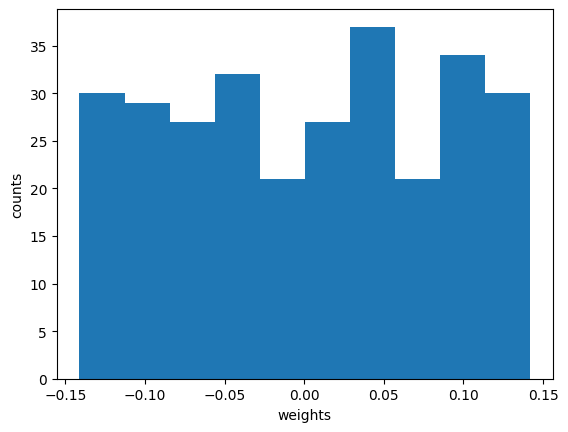

In [24]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('counts')
plt.show()

훈련되기 이전, 커널의 가중치는 고르게 분포한다.

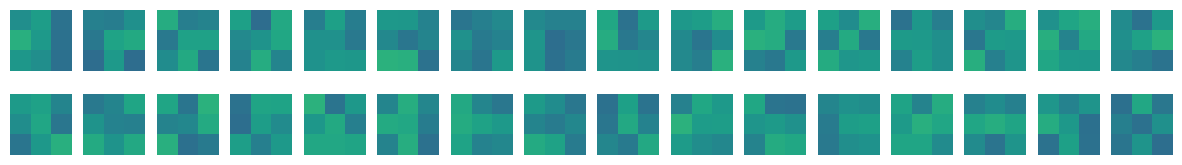

In [27]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

위의 결과를 통해서도 고른 분포를 보임을 알 수 있다.

훈련 전, 훈련 후 커널을 비교함으로써, 합성곱 신경망이 유용한 패턴을 학습했음을 알 수 있다.

## 2️⃣ 특성 맵

함수형 api를 이용해 첫 번째 합성곱층의 입력과 출력값으로 새로운 모델을 만들어 첫 번째 합성곱층이 만드는 특성맵을 시각화해 볼 수 있다.

(기존 모델은 predict하면 각 class별 확률이 출력되지만, conv_acti모델은 특성맵을 출력하므로, 현재 특성맵 분석에 적절하다.)

- 첫 번째 합성곱 층 모델 추출

In [29]:
conv_acti = keras.Model(model.input, model.layers[0].output)

4422102/4422102 [==============================] - 0s 0us/step


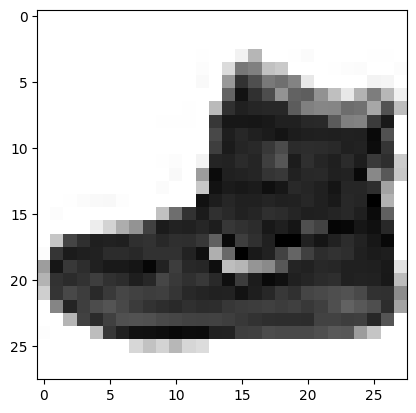

In [30]:
# data preparation
(train_input, train_target), (test_input, test_target) = \
                keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

특성맵 추출

In [31]:
print(train_input.shape)

(60000, 28, 28)


In [36]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 474ms/step


In [37]:
print(feature_maps.shape)

(1, 28, 28, 32)


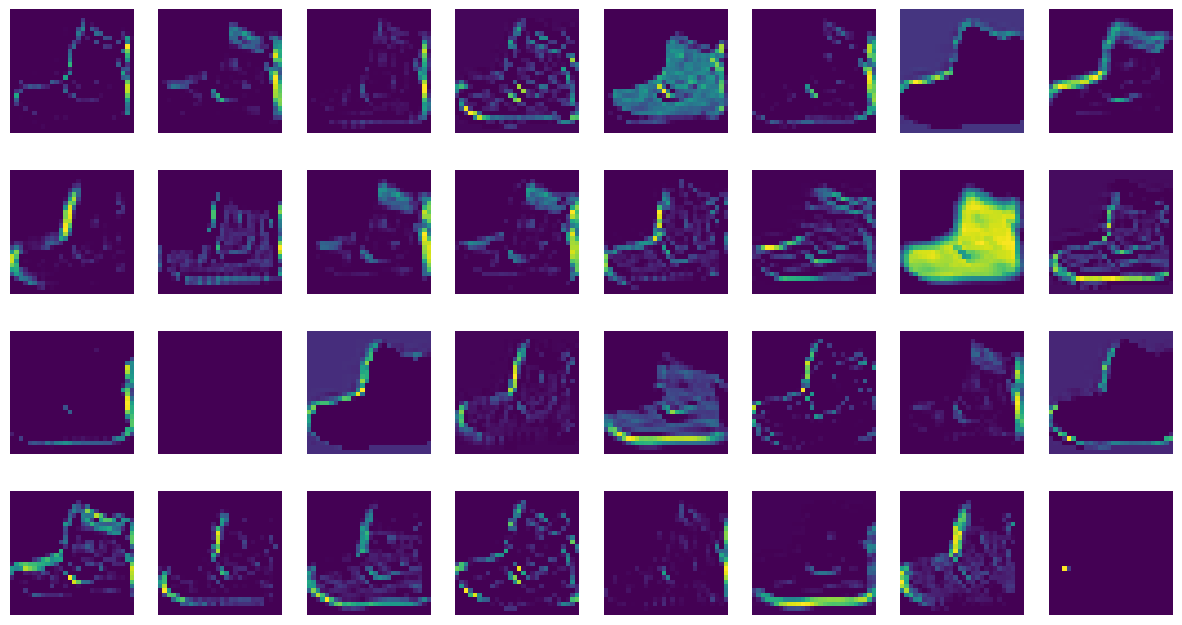

In [40]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')
plt.show()

앞의 필터 가중치와 비교하면, 각 필터들이 파악한 특성이 두드러진 특성맵이 출력됨을 알 수 있다.

- 두 번째 합성곱 층 추출

In [46]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [51]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 55ms/step


In [52]:
feature_maps.shape

(1, 14, 14, 64)

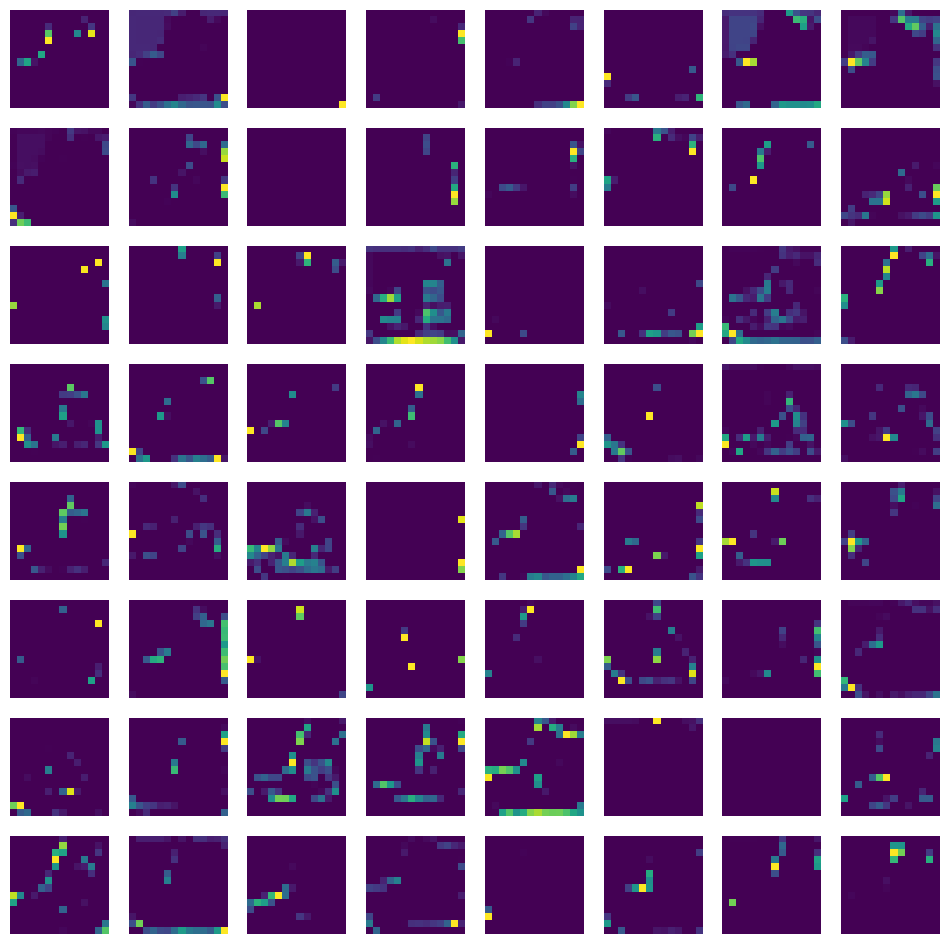

In [54]:
# feature_maps 시각화
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, 8*i + j])
    axs[i, j].axis('off')
plt.show()

(3, 3, 32) 크기의 커널이 (14, 14, 32)인 특성맵에 적용되었기에 어느 부분을 감지하는지 직관적으로 알기 어렵다.

이를 통해 전반부의 합성곱층은 시각적 정보를, 후반부의 합성곱 층은 추상적 정보를 학습한다고 볼 수 있다.
